<a href="https://colab.research.google.com/github/crew-guy/ml-with-tensorflow/blob/main/tf_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem, but, in our case, we're going to simplify it: predicting a numerical variable based on some other combitaion of variables, even shorter....predicting a number

In [ ]:
# Import tensorflow
import tensorflow as tf
tf.__version__

'2.9.2'

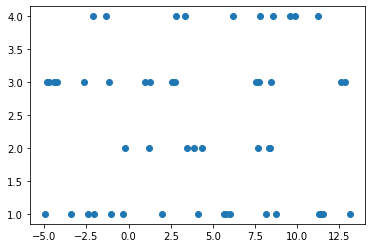

In [ ]:
## Creating data to view & fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.random.uniform(low=-5, high=13.3, size=(50,))

# Create labels
y = np.random.randint(low=1, high = 5, size=(50,))

# Visualize it
plt.scatter(X,y)

 ## Steps in modelling with tensorflow

 ![image](https://testbucket1841.s3.ap-south-1.amazonaws.com/archi.png)

 1. **Creating a model** - Define the input & output layers, as well as the hidden layers of a deep learning model.
 2. **Compiling a model** - Define the: 
    * Loss function - function that tells the model how wrong it is
    * Optimizer - suggests our model how to improve the patterns it is learning
    * Evaluation metrics - helps interpret performance of model

3.  **Fitting a model** - Letting the model try to find patters between X & y 
(features & labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile a model
model.compile(
    loss = tf.keras.losses.mae, # mae stands for "mean absolute error",
    optimizer = tf.keras.optimizers.SGD(), # SGD stands for stochastic gradient descent
    metrics = ["mae"]
)

# 3. Fit the model
# number of epochs = number of times our model trains over the entire sampling data
model.fit(X,y, epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 8ms/step - loss: 2.6800 - mae: 2.6800
Epoch 2/5
2/2 [==============================] - 0s 5ms/step - loss: 2.2903 - mae: 2.2903
Epoch 3/5
2/2 [==============================] - 0s 8ms/step - loss: 2.0777 - mae: 2.0777
Epoch 4/5
2/2 [==============================] - 0s 9ms/step - loss: 1.9742 - mae: 1.9742
Epoch 5/5
2/2 [==============================] - 0s 8ms/step - loss: 1.9183 - mae: 1.9183


In [ ]:
# Checkout X and y
X, y

(array([ 4.12818534,  7.67035648,  3.49194408,  7.81072995,  6.18725688,
        12.61424347,  5.64057441, 11.2483332 , -4.25061215,  7.74707244,
        -4.7092635 , -4.93297237,  8.47445362, -2.40440109,  4.36180306,
        12.82076863,  9.5660369 ,  8.56949725, -4.82142021, 11.51862934,
        -1.34623275, -2.12396422,  6.03685754, -1.14952213,  8.35942017,
        -3.39336743,  9.8564043 ,  7.57873721,  8.73130185, 13.11737262,
        -1.0639401 ,  1.24717976, -0.33561597, -2.62678873,  2.80621387,
         8.3121512 ,  0.99182778, -0.21210277, 11.31415366, -4.40761059,
         3.34917921, 11.39556056,  3.90760376, -2.04282741,  2.59697155,
         1.96727058,  1.23834617,  8.12457348,  5.75346713,  2.775441  ]),
 array([1, 2, 2, 4, 4, 3, 1, 4, 3, 3, 3, 1, 3, 1, 2, 3, 4, 4, 3, 1, 4, 4,
        1, 3, 2, 1, 4, 3, 1, 1, 1, 3, 1, 3, 4, 2, 3, 2, 1, 3, 4, 1, 2, 1,
        3, 1, 2, 1, 1, 3]))

In [ ]:
# Try to make a prediction using our model
model.predict([11.9])

1/1 [==============================] - 0s 97ms/step


array([[3.5791125]], dtype=float32)

## Improving our model

Look at the 3 steps we took to create our model & see how you can improve accuracy during each step


1. **Creating a model** - Here, we can add more layers, increase number of hidden units ("neurons") in each hidden layer, change the activation function
2. **Compiling a model** - Here, we can change the optimization function or change the **learning rate** of the optimization function
3. **Training a model** - Here we might fit a model for more epochs (more cycles through sample data) or give it a larger sample data to train on, for each cycle

Changing all these values is called as "hyperparameter tuning"

In [ ]:
# Let's rebuild our model

X = tf.cast(tf.constant(X), dtype=tf.float64)
y = tf.cast(tf.constant(y), dtype=tf.float64)

print(X.shape)

# 1. Create our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu", input_shape=[1,]),
    # tf.keras.layers.Dense(1, activation=None, input_shape=[1,]),
])

# 2. Compile our model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01), # lr = learning_rate is one of the most important hyperparameters of machine learning
    metrics=["mae"]
)
# 3. Train our model
model.fit(X,y, epochs=100)

(50,)
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 0s 9ms/step - loss: 2.6111 - mae: 2.6111
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 2.5297 - mae: 2.5297
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 2.4444 - mae: 2.4444
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 2.3536 - mae: 2.3536
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 2.2692 - mae: 2.2692
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 2.1921 - mae: 2.1921
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 2.1244 - mae: 2.1244
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 2.0513 - mae: 2.0513
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 1.9777 - mae: 1.9777
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 1.9268 - mae: 1.9268
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - loss: 1.8797 - mae: 1.8

In [ ]:
X,y

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
 array([ 4.12818534,  7.67035648,  3.49194408,  7.81072995,  6.18725688,
        12.61424347,  5.64057441, 11.2483332 , -4.25061215,  7.74707244,
        -4.7092635 , -4.93297237,  8.47445362, -2.40440109,  4.36180306,
        12.82076863,  9.5660369 ,  8.56949725, -4.82142021, 11.51862934,
        -1.34623275, -2.12396422,  6.03685754, -1.14952213,  8.35942017,
        -3.39336743,  9.8564043 ,  7.57873721,  8.73130185, 13.11737262,
        -1.0639401 ,  1.24717976, -0.33561597, -2.62678873,  2.80621387,
         8.3121512 ,  0.99182778, -0.21210277, 11.31415366, -4.40761059,
         3.34917921, 11.39556056,  3.90760376, -2.04282741,  2.59697155,
         1.96727058,  1.23834617,  8.12457348,  5.75346713,  2.775441  ])>,
 <tf.Tensor: shape=(50,), dtype=float64, numpy=
 array([1., 2., 2., 4., 4., 3., 1., 4., 3., 3., 3., 1., 3., 1., 2., 3., 4.,
        4., 3., 1., 4., 4., 1., 3., 2., 1., 4., 3., 1., 1., 1., 3., 1., 3.,
        4., 2., 3.,

In [ ]:
model.predict([11.90])

1/1 [==============================] - 0s 64ms/step


array([[2.5509062]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


 ## Evaluating a model

 In practice, a typical workflow you will go through when building neural networks looks like

 ```
 Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> .....
 ```

While evaluating a model, 3 most important words are:

> Visualize, visualize, visualize 

It's a good idea to visualize 

* The data - What data are we working with? What does the data look like? 
* The model itself - what does our model look like
* The training of a model - How does a model perform as it is learning?
* The predictions of the model -How do the predictions match up against the ground truth (the original labels)


In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
y = X + 10

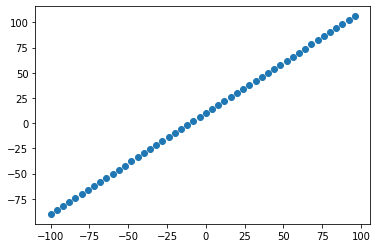

In [ ]:
plt.scatter(X,y)

### The 3 sets...

```
 Build a model -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak the model -> .....
```

* **Training Set** - The data that the model is trained on. It learns from this data - 70-80% of the total data
* **Validation Set** - The model gets tweaked ("tuned") on this data. 10-15% of total data
* **Test Set** - The model gets evaluated on this data. 10-15% of total data.


In [ ]:
# Get 80% of data as training set
X_train = X[:40] # Get 40 rows out of 50 total (80% of the data)
y_train = y[:40]

# Get 10% of the data as test set
X_test = tf.slice(X,begin=[39],size=[10])
y_test = tf.slice(y,begin=[39],size=[10])

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing the data (for different sets)

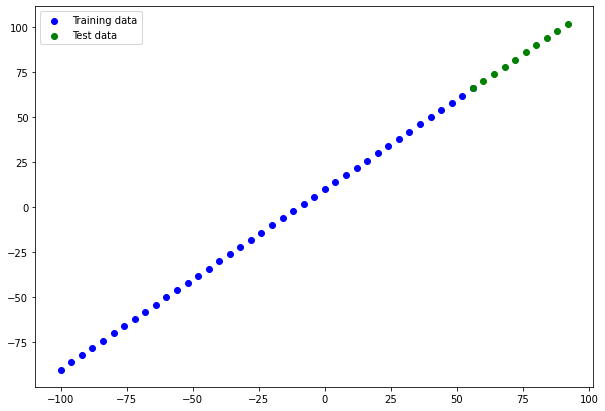

In [ ]:
# Visualizing the data
plt.figure(figsize=(10,7))

# For the training data
plt.scatter(X_train, y_train, c="blue", label="Training data")

# For the test data
plt.scatter(X_test, y_test, c="green", label="Test data")

# Show legend
plt.legend()

## Visualizing the model

In [ ]:
# We are passing in 1 variable to the layer to get 1 output number
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create our model with an input-shape so that it gets automatically built without specifically calling the fit() or build() function
tf.random.set_seed(42)


# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="hidden_layer_1"),
    tf.keras.layers.Dense(1, input_shape=[10], name="hidden_layer_2"),
], name="deep_model_1")

# 2. Compiling the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

In [ ]:
model.summary()

Model: "deep_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                20        
                                                                 
 hidden_layer_2 (Dense)      (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - The total number of weights (theta values) in the model
* Trainable params - The number of parameters that are updated when the model is training
* Non-trainable params - The number of parameters that are not updated when the model is training. Typically happens when we freeze the value of certain parameters when we bring in an already learnt model during **transfer learning** 


📖 Resource - for more understanding on types of parameters - check out MIT's deep learning video

In [ ]:
# Let's fit our model to training data
# Set the "verbose" argument to decide whether you look at your model train or not
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 7

In [ ]:
model.summary()

Model: "deep_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 10)                20        
                                                                 
 hidden_layer_2 (Dense)      (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


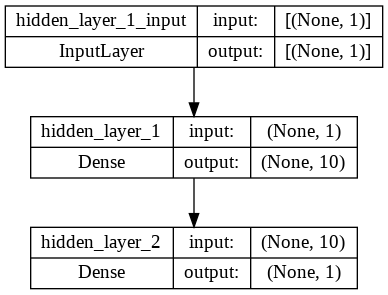

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize our model's predictions, it's a good idea to plot them against ground truth values

Usually we see plots of the from `y_test` or `y_true` vs `y_pred` (ground truth vs model)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 130ms/step


array([[ 65.96446 ],
       [ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975]], dtype=float32)

In [ ]:
 def plot_predictions(
     train_data = X_train,
     train_labels = y_train,
     test_data = X_test,
     test_labels = y_test,
     predictions = y_pred
 ):
    plt.figure(figsize=(10,7))

    # Plot the training data
    plt.scatter(X_train, y_train, c="b", label="Training data")


    # Plot the test data
    plt.scatter(X_test, y_test, c="g", label="Test data")

    # Plot the predictions
    plt.scatter(X_test, predictions, c="r", label="Predictions")

    # Show the legend
    plt.legend()

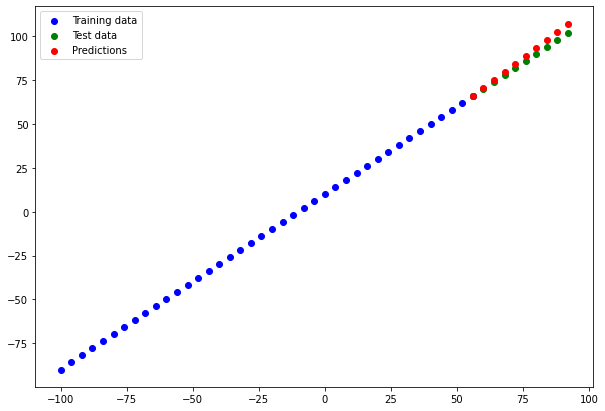

In [ ]:
plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = y_pred
)

## Evaluating our model's predictions with regression evaluation metrics


Depending on the problem we're working on, we can use different evaluation metrics to evaluate our model's performance

Since we're working with a regression problem, 2 common evaluation metrics include

* MAE - Mean average error - On average, how wrong is each prediction by my model?
* MSE - Mean squared error - Square of the average errors

![regression eval metrics](https://testbucket1841.s3.ap-south-1.amazonaws.com/regress-eval-metrics.png)



In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 159ms/step - loss: 2.6163 - mae: 2.6163


[2.6163222789764404, 2.6163222789764404]

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 65.96446 ,  70.552185,  75.13991 ,  79.72764 ,  84.315346,
        88.90308 ,  93.49081 ,  98.07852 , 102.666245, 107.253975],
      dtype=float32)>

In [ ]:
# Calculate the mean square absolute error
mae = tf.keras.metrics.mean_absolute_error(
    y_test, tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.6163247>

In [ ]:
def calculate_mean_squared_absolute_error(y_test = y_test, y_pred = y_pred):
    difference = tf.subtract(tf.cast(y_test, dtype=tf.int32),tf.cast(y_pred, dtype=tf.int32))
    square_difference = tf.math.square(difference)
    msd = tf.math.reduce_mean(square_difference, axis=0)
    return msd

In [ ]:
mse = calculate_mean_squared_absolute_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
mse = tf.keras.metrics.mean_squared_error(
    y_true=y_test, y_pred = tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.657718>

In [ ]:
# Make some reusable functions for mse & mae

def mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(
        y_true, y_pred = tf.squeeze(y_pred)
    )

def mae(y_true, y_pred):
    return tf.keras.metrics.mean_absolute_error(
        y_true, y_pred = tf.squeeze(y_pred)
    )


## Running experiments for improving our model


```
Build the model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> .....
```


Approaches to improve accuracy

1. Get more data -> Get a larger dataset that we can train our model on
2. Make model larger -> Use more hidden layers or increase number of neurons in each hidden layer
3. Train for longer -> Give your model more of a chance to find patterns in the dataset

Let's do 3 modelling experiments

1. `model_1` : Same as original model - 1 layer, 100 epochs
2. `model_2` : 2 layers, trained for 100 epochs
3. `model_3` : 2 layers, trained for 500 epochs

In [ ]:
# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

# 3. Train the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 20.6477 - mae: 20.6477
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5278 - mae: 9.5278
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2127 - mae: 11.2127
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.6034 - mae: 9.6034
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5184 - mae: 10.5184
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7389 - mae: 9.7389
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8284 - mae: 8.8284
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0662 - mae: 9.0662
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.3971 - mae: 19.3971
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4734 - mae: 10.4734
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - lo

In [ ]:

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[20])
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)


model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 29.7738 - mae: 29.7738
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 26.7179 - mae: 26.7179
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 30.3707 - mae: 30.3707
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 16.5287 - mae: 16.5287
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 22.6808 - mae: 22.6808
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0366 - mae: 11.0366
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.0758 - mae: 12.0758
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.9377 - mae: 10.9377
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 38.0599 - mae: 38.0599
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.6399 - mae: 25.6399
Epoch 11/100
2/2 [==============================] - 0s 5ms

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = [1]),
    tf.keras.layers.Dense(1, input_shape=[20])
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

model_3.fit(X_train, y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 6ms/step - loss: 43.5393 - mae: 43.5393
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 32.6136 - mae: 32.6136
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 36.4305 - mae: 36.4305
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 32.9259 - mae: 32.9259
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 17.5855 - mae: 17.5855
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 10.2715 - mae: 10.2715
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2613 - mae: 11.2613
Epoch 8/500
2/2 [==============================] - 0s 15ms/step - loss: 11.1558 - mae: 11.1558
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 40.9967 - mae: 40.9967
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 28.3224 - mae: 28.3224
Epoch 11/500
2/2 [==============================] - 0s 7m

In [ ]:
y_eval_2 = model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 9.1136 - mae: 9.1136


In [ ]:
y_eval_3 = model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 49ms/step - loss: 64.8998 - mae: 64.8998


In [ ]:
y_eval_1 = model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 29.4228 - mae: 29.4228


In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 54ms/step


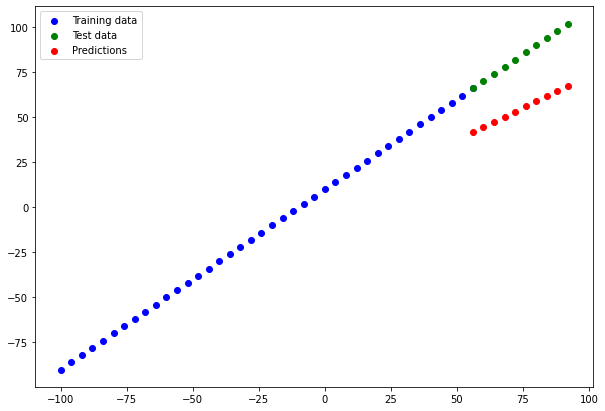

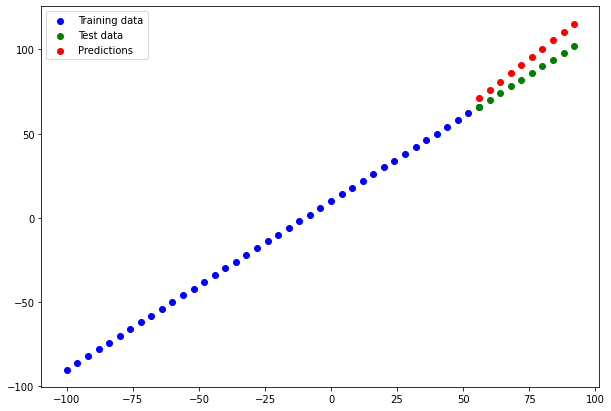

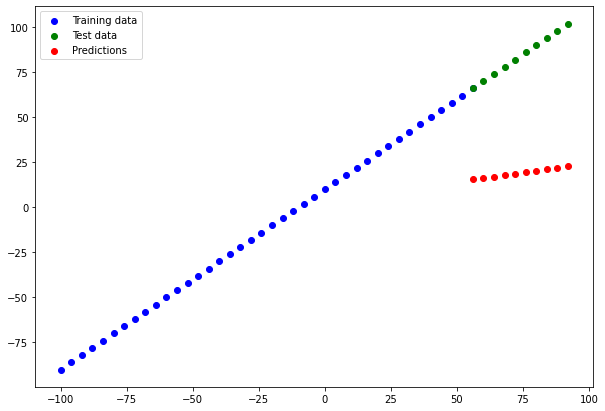

In [ ]:
# Plotting the graphs
plot_predictions(
    predictions = y_pred_1
)

plot_predictions(
    predictions = y_pred_2
)

plot_predictions(
    predictions = y_pred_3
)

In [ ]:
# Calculate model_1, model_2, model_3 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

print("mae 1:", mae_1.numpy(), "\n")
print("mae 2:", mae_2.numpy(), "\n")
print("mae 3:", mae_3.numpy(), "\n")

print("\n")
print("mse 1:", mse_1.numpy(), "\n")
print("mse 2:", mse_2.numpy(), "\n")
print("mse 3:", mse_3.numpy(), "\n")

mae 1: 29.422766 

mae 2: 9.113599 

mae 3: 64.89977 



mse 1: 876.0576 

mse 2: 90.3181 

mse 3: 4296.6626 



## Compare experiment results

We've run a few experiments. Let's compare the results of these experiments now.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results = [
    ["model 1", mae_1.numpy(), mse_1.numpy()],
    ["model 2", mae_2.numpy(), mse_2.numpy()],
    ["model 3", mae_3.numpy(), mse_3.numpy()],
]


all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,model 1,29.422766,876.057617
1,model 2,9.113599,90.318100
2,model 3,64.899773,4296.662598


Looks like `model_2` performed the best

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                40        
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note** : One of your main goals is to minimize the time between your experiements. The more things you try out, the more you will figure out which don't work, the closer you will get to figuring out what does work
<br/>
> Machine learning practitioner's motto - "experiment, experiment, experiment" 

In [ ]:
## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiements. And when doing so, it can be tedious if you're running lot's of experiments

📖 Resource : Helpful tools in this situation are:
1.